In [2]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F
import logging
logging.getLogger('maelzel.scoring').setLevel('DEBUG')

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.2
Best 1 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(1,)",[«0.000:1.000 1/1♩ 4C tiedNext»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.2
Best 1 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(1,)",[«0.000:1.000 1/1♩ 4C tiedPrev»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.2
Best 13 divisions: 


error,div,makeSnappedNotation,slots,info
0.002,"(7,)","[«0.000:0.143 1/7♩ 4C#», «0.143:1.000 6/7♩ 4D tiedNext»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.025225,"(5, 1, 1, 1)","[«0.000:0.150 3/20♩ 4C#», «0.150:1.000 17/20♩ 4D tiedNext»]","[0, 3]","gridError=0.0192, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.025225,"(4, 1, 1, 1, 1)","[«0.000:0.150 3/20♩ 4C#», «0.150:1.000 17/20♩ 4D tiedNext»]","[0, 3]","gridError=0.0192, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.029718,"(3, 1, 1, 1, 1)","[«0.000:0.133 2/15♩ 4C#», «0.133:1.000 13/15♩ 4D tiedNext»]","[0, 2]","gridError=0.0246, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.0541 (0.0005408, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.041978,"(8,)","[«0.000:0.125 1/8♩ 4C#», «0.125:1.000 7/8♩ 4D tiedNext»]","[0, 1]","gridError=0.0419, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.042275,"(2, 1, 1, 1)","[«0.000:0.125 1/8♩ 4C#», «0.125:1.000 7/8♩ 4D tiedNext»]","[0, 1]","gridError=0.0419, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.055643,"(6,)","[«0.000:0.167 1/6♩ 4C#», «0.167:1.000 5/6♩ 4D tiedNext»]","[0, 1]","gridError=0.0535, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.055832,"(2, 1, 1)","[«0.000:0.167 1/6♩ 4C#», «0.167:1.000 5/6♩ 4D tiedNext»]","[0, 1]","gridError=0.0535, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.055868,"(3, 1, 1, 1)","[«0.000:0.167 1/6♩ 4C#», «0.167:1.000 5/6♩ 4D tiedNext»]","[0, 2]","gridError=0.0535, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.068497,"(9,)","[«0.000:0.111 1/9♩ 4C#», «0.111:1.000 8/9♩ 4D tiedNext»]","[0, 1]","gridError=0.0684, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 3 - 4 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.2
Best 2 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(3,)","[«0.000:0.333 1/3♩ 4D tiedPrev», «0.333:1.000 2/3♩ rest»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10219,"(5,)","[«0.000:0.400 2/5♩ 4D tiedPrev», «0.400:1.000 3/5♩ rest»]","[0, 2]","gridError=0.102, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Node(1/1, 
  «0.000:1.000 1/1♩ 4C tiedNext»
) Node(1/1, 
  «1.000:2.000 1/1♩ 4C tiedPrev»
) acrossBeat=True, syncopated=True



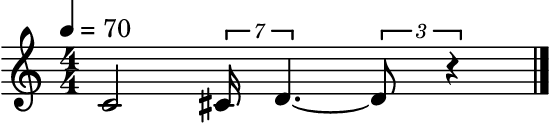

In [8]:
notes = [
    (60, F(2, 1)),
    (61, F(1, 7)),
    (62, F(6, 7)+F(1, 3))
]

struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)
qprofile = scoring.quant.QuantizationProfile.fromPreset('high')
qprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=qprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 1 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(1,)",[«0.000:1.000 1/1♩ 4C tiedNext»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 1 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(1,)",[«0.000:1.000 1/1♩ 4C tiedPrev»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 17 divisions: 


error,div,makeSnappedNotation,slots,info
0.002,"(4,)","[«0.000:0.750 3/4♩ 4C#», «0.750:1.000 1/4♩ 4D#»]","[0, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.005,"(1, 2)","[«0.000:0.750 3/4♩ 4C#», «0.750:1.000 1/4♩ 4D#»]","[0, 2]","gridError=0, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0053852,"(1, 1, 4)","[«0.000:0.750 3/4♩ 4C#», «0.750:1.000 1/4♩ 4D#»]","[0, 3]","gridError=0, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.01077,"(1, 1, 1, 4, 1)","[«0.000:0.750 3/4♩ 4C#», «0.750:1.000 1/4♩ 4D#»]","[0, 6]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.033864,"(1, 1, 9)","[«0.000:0.741 20/27♩ 4C#», «0.741:1.000 7/27♩ 4D#»]","[0, 4]","gridError=0.0299, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.037024,"(1, 1, 1, 5, 1)","[«0.000:0.760 19/25♩ 4C#», «0.760:1.000 6/25♩ 4D#»]","[0, 7]","gridError=0.0318, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.06 (0.0006, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.039983,"(1, 1, 7)","[«0.000:0.762 16/21♩ 4C#», «0.762:1.000 5/21♩ 4D#»]","[0, 4]","gridError=0.0365, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.0374 (0.0003742, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.050503,"(1, 1, 5)","[«0.000:0.733 11/15♩ 4C#», «0.733:1.000 4/15♩ 4D#»]","[0, 3]","gridError=0.0478, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.0374 (0.0003742, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.05141,"(1, 1, 1, 3, 1)","[«0.000:0.733 11/15♩ 4C#», «0.733:1.000 4/15♩ 4D#»]","[0, 5]","gridError=0.0478, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0561 (0.0005612, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.062094,"(11,)","[«0.000:0.727 8/11♩ 4C#», «0.727:1.000 3/11♩ 4D#»]","[0, 8]","gridError=0.0613, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.1 (0.001, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Node(1/1, 
  «0.000:1.000 1/1♩ 4C tiedNext»
) Node(1/1, 
  «1.000:2.000 1/1♩ 4C tiedPrev»
) acrossBeat=True, syncopated=True
Node(1/1, 
  «0.000:2.000 2/1♩ 4C»
) Node(1/1, 
  «2.000:2.750 3/4♩ 4C#»
  «2.750:3.000 1/4♩ 4D#»
) acrossBeat=True, syncopated=False
Node(1/1, 
  «2.000:2.750 3/4♩ 4C#»
  «2.750:3.000 1/4♩ 4D#»
) Node(1/1, 
  «3.000:4.000 1/1♩ rest»
) acrossBeat=True, syncopated=False



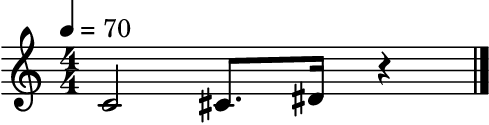

In [9]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct

notes = [
    (60, F(2, 1)),
    (61, F(3, 4)),
    (63, F(1, 4)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.Part(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.debug = True
quantprofile.debugMaxDivisions = 20
quantprofile.rhythmComplexityWeight = 0.001
quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
r

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 1 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(1,)",[«0.000:1.000 1/1♩ 4C tiedNext»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 1 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(1,)",[«0.000:1.000 1/1♩ 4C tiedPrev»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.010729,"(1, 1, 8)","[«0.000:0.750 3/4♩ 4C#», «0.750:0.792 1/24♩ 4D#», «0.792:1.000 5/24♩ 4E»]","[0, 4, 5]","gridError=0, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.01077,"(1, 1, 1, 6)","[«0.000:0.750 3/4♩ 4C#», «0.750:0.792 1/24♩ 4D#», «0.792:1.000 5/24♩ 4E»]","[0, 3, 4]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.021361,"(1, 1, 1, 7)","[«0.000:0.750 3/4♩ 4C#», «0.750:0.786 1/28♩ 4D#», «0.786:1.000 3/14♩ 4E»]","[0, 3, 4]","gridError=0.021, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.027754,"(1, 1, 1, 5)","[«0.000:0.750 3/4♩ 4C#», «0.750:0.800 1/20♩ 4D#», «0.800:1.000 1/5♩ 4E»]","[0, 3, 4]","gridError=0.0275, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.027953,"(1, 1, 1, 4, 1)","[«0.000:0.750 3/4♩ 4C#», «0.750:0.800 1/20♩ 4D#», «0.800:1.000 1/5♩ 4E»]","[0, 6, 7]","gridError=0.0275, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.046057,"(1, 1, 1, 5, 1)","[«0.000:0.760 19/25♩ 4C#», «0.760:0.800 1/25♩ 4D#», «0.800:1.000 1/5♩ 4E»]","[0, 7, 8]","gridError=0.0444, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.06 (0.0006, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.055446,"(1, 1, 9)","[«0.000:0.741 20/27♩ 4C#», «0.741:0.778 1/27♩ 4D#», «0.778:1.000 2/9♩ 4E»]","[0, 4, 5]","gridError=0.0544, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.057303,"(1, 1, 1, 4)","[«0.000:0.750 3/4♩ 4C#», «0.750:0.812 1/16♩ 4D#», «0.812:1.000 3/16♩ 4E»]","[0, 3, 4]","gridError=0.0572, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0667,"(1, 1, 7)","[«0.000:0.762 16/21♩ 4C#», «0.762:0.810 1/21♩ 4D#», «0.810:1.000 4/21♩ 4E»]","[0, 4, 5]","gridError=0.0665, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0374 (0.0003742, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.067079,"(1, 1, 5)","[«0.000:0.733 11/15♩ 4C#», «0.733:0.800 1/15♩ 4D#», «0.800:1.000 1/5♩ 4E»]","[0, 3, 4]","gridError=0.0661, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.0374 (0.0003742, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"


Node(1/1, 
  «0.000:1.000 1/1♩ 4C tiedNext»
) Node(1/1, 
  «1.000:2.000 1/1♩ 4C tiedPrev»
) acrossBeat=True, syncopated=True



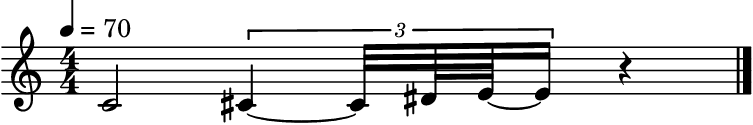

In [10]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct

notes = [
    (60, F(2, 1)),
    (61, F(3, 4)),
    (63, F(1, 4)*F(1, 6)),
    (64, F(1, 4)*F(5, 6)),
    # (62, F(3, 4))
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.Part(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.debug = True
quantprofile.debugMaxDivisions = 20
quantprofile.rhythmComplexityWeight = 0.001
quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
r

In [9]:
tree = score.parts[0].measures[0].tree()
tree

Node(1/1, 
  Node(1/1, 
    «0.000:2.000 2/1♩ 4C»
  )
  Node(3/2, 
    «2.000:2.667 2/3♩ 3/2 4C# tiedNext»
    Node(1/1, 
      «2.667:2.750 1/12♩ 3/2 4C# tiedPrev»
      «2.750:2.792 1/24♩ 3/2 4D#»
      «2.792:2.833 1/24♩ 3/2 4E tiedNext»
      «2.833:3.000 1/6♩ 3/2 4E tiedPrev»
    )
  )
  Node(1/1, 
    «3.000:4.000 1/1♩ rest»
  )
)

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.0028245,"(5, 5, 1)","[«0.000:0.133 2/15♩ 4C», «0.133:0.267 2/15♩ 4C#», «0.267:0.400 2/15♩ 4D», «0.400:0.533 2/15♩ 4D#», «0.533:0.667 2/15♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 2, 4, 6, 8, 10]","gridError=0, rhythmComplexity=0.0527 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.059115,"(5, 8, 1)","[«0.000:0.133 2/15♩ 4C», «0.133:0.267 2/15♩ 4C#», «0.267:0.417 3/20♩ 4D», «0.417:0.542 1/8♩ 4D#», «0.542:0.667 1/8♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 2, 4, 7, 10, 13]","gridError=0.059, rhythmComplexity=0.0527 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.059115,"(8, 5, 1)","[«0.000:0.125 1/8♩ 4C», «0.125:0.250 1/8♩ 4C#», «0.250:0.400 3/20♩ 4D», «0.400:0.533 2/15♩ 4D#», «0.533:0.667 2/15♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 3, 6, 9, 11, 13]","gridError=0.059, rhythmComplexity=0.0527 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.060465,"(9, 5, 1)","[«0.000:0.148 4/27♩ 4C», «0.148:0.259 1/9♩ 4C#», «0.259:0.400 0.141♩ 4D», «0.400:0.533 2/15♩ 4D#», «0.533:0.667 2/15♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 4, 7, 10, 12, 14]","gridError=0.0602, rhythmComplexity=0.167 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.060465,"(5, 9, 1)","[«0.000:0.133 2/15♩ 4C», «0.133:0.267 2/15♩ 4C#», «0.267:0.407 0.141♩ 4D», «0.407:0.519 1/9♩ 4D#», «0.519:0.667 4/27♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 2, 4, 7, 10, 14]","gridError=0.0602, rhythmComplexity=0.167 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.065992,"(7, 5, 1)","[«0.000:0.143 1/7♩ 4C», «0.143:0.286 1/7♩ 4C#», «0.286:0.400 4/35♩ 4D», «0.400:0.533 2/15♩ 4D#», «0.533:0.667 2/15♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 3, 6, 8, 10, 12]","gridError=0.0657, rhythmComplexity=0.0527 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.133 (0.0002653, divPenalty=0.04, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0)"
0.065992,"(5, 7, 1)","[«0.000:0.133 2/15♩ 4C», «0.133:0.267 2/15♩ 4C#», «0.267:0.381 4/35♩ 4D», «0.381:0.524 1/7♩ 4D#», «0.524:0.667 1/7♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 2, 4, 6, 9, 12]","gridError=0.0657, rhythmComplexity=0.0527 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.133 (0.0002653, divPenalty=0.04, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0)"
0.076653,"(2, 5, 6, 1)","[«0.000:0.125 1/8♩ 4C», «0.125:0.250 1/8♩ 4C#», «0.250:0.400 3/20♩ 4D», «0.400:0.542 0.142♩ 4D#», «0.542:0.667 1/8♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 1, 2, 5, 8, 11]","gridError=0.0764, rhythmComplexity=0.19 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0678 (0.0001356, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.083453,"(6, 5, 1)","[«0.000:0.111 1/9♩ 4C», «0.111:0.278 1/6♩ 4C#», «0.278:0.400 11/90♩ 4D», «0.400:0.533 2/15♩ 4D#», «0.533:0.667 2/15♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 2, 5, 7, 9, 11]","gridError=0.0833, rhythmComplexity=0.167 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.083453,"(5, 6, 1)","[«0.000:0.133 2/15♩ 4C», «0.133:0.267 2/15♩ 4C#», «0.267:0.389 11/90♩ 4D», «0.389:0.556 1/6♩ 4D#», «0.556:0.667 1/9♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 2, 4, 6, 9, 11]","gridError=0.0833, rhythmComplexity=0.167 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 2 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(3,)","[«0.000:0.333 1/3♩ 4F tiedPrev», «0.333:1.000 2/3♩ rest»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11685,"(5,)","[«0.000:0.400 2/5♩ 4F tiedPrev», «0.400:1.000 3/5♩ rest»]","[0, 2]","gridError=0.117, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



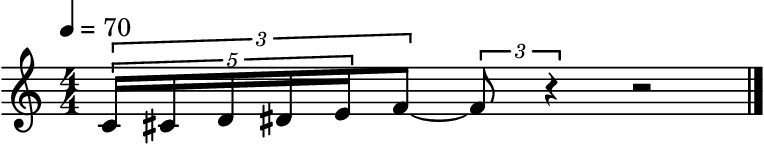

In [10]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

notes = [
    (60, F(2, 3)*F(1, 5)),
    (61, F(2, 3)*F(1, 5)),
    (62, F(2, 3)*F(1, 5)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2,3)),
    #(60, F(2, 7)),
    #(61, F(3, 7)),
    #(62, F(4, 7))
    
    
    ]

struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.rhythmComplexityWeight  = 0.001
quantprofile.debug=True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r.write('~/tmp/bigtriplet.ly')
r

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.0063246,"(1, 1, 1, 2, 2)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.700 1/10♩ 4E», «0.700:0.800 1/10♩ 4F», «0.800:0.900 1/10♩ 4F#», «0.900:1.000 1/10♩ 4G»]","[0, 3, 4, 5, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0089443,"(1, 5)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.700 1/10♩ 4E», «0.700:0.800 1/10♩ 4F», «0.800:0.900 1/10♩ 4F#», «0.900:1.000 1/10♩ 4G»]","[0, 2, 3, 4, 5]","gridError=0, rhythmComplexity=0.0632 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.022804,"(1, 1, 5, 5)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.700 1/10♩ 4E», «0.700:0.800 1/10♩ 4F», «0.800:0.900 1/10♩ 4F#», «0.900:1.000 1/10♩ 4G»]","[0, 4, 6, 8, 10]","gridError=0, rhythmComplexity=0.126 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.06 (0.006, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.057831,"(1, 1, 5, 7)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.700 1/10♩ 4E», «0.700:0.786 3/35♩ 4F», «0.786:0.893 3/28♩ 4F#», «0.893:1.000 3/28♩ 4G»]","[0, 4, 6, 8, 11]","gridError=0.0522, rhythmComplexity=0.126 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0678 (0.006782, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.058489,"(1, 1, 1, 5, 2)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.680 2/25♩ 4E», «0.680:0.800 3/25♩ 4F», «0.800:0.900 1/10♩ 4F#», «0.900:1.000 1/10♩ 4G»]","[0, 3, 5, 8, 9]","gridError=0.0553, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.06 (0.006, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.058489,"(1, 1, 1, 2, 5)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.700 1/10♩ 4E», «0.700:0.800 1/10♩ 4F», «0.800:0.880 2/25♩ 4F#», «0.880:1.000 3/25♩ 4G»]","[0, 3, 4, 5, 7]","gridError=0.0553, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.06 (0.006, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.060864,"(1, 1, 7, 5)","[«0.000:0.607 17/28♩ 4C#», «0.607:0.714 3/28♩ 4E», «0.714:0.800 3/35♩ 4F», «0.800:0.900 1/10♩ 4F#», «0.900:1.000 1/10♩ 4G»]","[0, 5, 8, 10, 12]","gridError=0.0522, rhythmComplexity=0.228 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0678 (0.006782, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.073174,"(1, 1, 6, 5)","[«0.000:0.583 7/12♩ 4C#», «0.583:0.708 1/8♩ 4E», «0.708:0.800 0.092♩ 4F», «0.800:0.900 1/10♩ 4F#», «0.900:1.000 1/10♩ 4G»]","[0, 4, 7, 9, 11]","gridError=0.0661, rhythmComplexity=0.228 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0678 (0.006782, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.073174,"(1, 1, 5, 6)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.700 1/10♩ 4E», «0.700:0.792 0.092♩ 4F», «0.792:0.917 1/8♩ 4F#», «0.917:1.000 1/12♩ 4G»]","[0, 4, 6, 8, 11]","gridError=0.0661, rhythmComplexity=0.228 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0678 (0.006782, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.085126,"(1, 1, 1, 3, 2)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.667 1/15♩ 4E», «0.667:0.800 2/15♩ 4F», «0.800:0.900 1/10♩ 4F#», «0.900:1.000 1/10♩ 4G»]","[0, 3, 4, 6, 7]","gridError=0.0833, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.0561 (0.005612, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.4
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.027558,"(1, 1, 3, 1, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.533 1/3♩ 4D», «0.533:1.000 7/15♩ rest»]","[0, 1, 4]","gridError=0, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0561 (0.005612, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.042942,"(1, 1, 5, 1, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.520 8/25♩ 4D», «0.520:1.000 12/25♩ rest»]","[0, 1, 5]","gridError=0.0322, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.06 (0.006, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.052203,"(5, 9)","[«0.000:0.200 1/5♩ 4C», «0.200:0.556 16/45♩ 4D», «0.556:1.000 4/9♩ rest»]","[0, 2, 6]","gridError=0.0485, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.051 (0.005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.055588,"(1, 1, 4, 1, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.550 7/20♩ 4D», «0.550:1.000 9/20♩ rest»]","[0, 1, 5]","gridError=0.0385, rhythmComplexity=0.38 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.04 (0.004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.057359,"(5, 1, 5, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.550 7/20♩ 4D», «0.550:1.000 9/20♩ rest»]","[0, 4, 7]","gridError=0.0385, rhythmComplexity=0.38 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.06 (0.006, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.067406,"(5, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.500 3/10♩ 4D», «0.500:1.000 1/2♩ rest»]","[0, 2, 5]","gridError=0.0671, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.069099,"(5, 1, 1, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.500 3/10♩ 4D», «0.500:1.000 1/2♩ rest»]","[0, 4, 6]","gridError=0.0671, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.04 (0.004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.07006,"(5, 8)","[«0.000:0.200 1/5♩ 4C», «0.200:0.562 29/80♩ 4D», «0.562:1.000 7/16♩ rest»]","[0, 2, 6]","gridError=0.0603, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (0.004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.070502,"(5, 1, 7, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.536 0.336♩ 4D», «0.536:1.000 13/28♩ rest»]","[0, 4, 7]","gridError=0.00813, rhythmComplexity=0.667 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.0678 (0.006782, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.070626,"(1, 1, 2, 1, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.500 3/10♩ 4D», «0.500:1.000 1/2♩ rest»]","[0, 1, 3]","gridError=0.0671, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



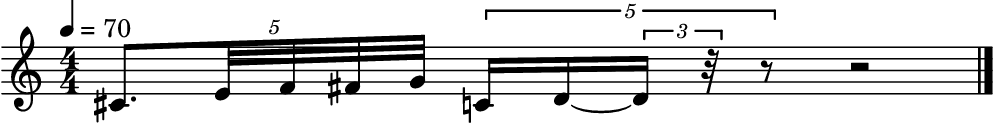

In [11]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

notes = [
    (61, F(1, 2)+F(1,10)),
    (64, F(1, 10)),
    (65, F(1, 10)),
    (66, F(1, 10)),
    (67, F(1, 10)),
    
    (60, F(1, 5)),
    (62, F(1, 3)),
    
]
struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', nestedTuplets=True)
quantprofile.divisionErrorWeight = 0.1
quantprofile.rhythmComplexityWeight = 0.01
quantprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.2
Best 2 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(3,)","[«0.000:0.667 2/3♩ 4C#», «0.667:1.000 1/3♩ 4E tiedNext»]","[0, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.12855,"(5,)","[«0.000:0.600 3/5♩ 4C#», «0.600:1.000 2/5♩ 4E tiedNext»]","[0, 3]","gridError=0.128, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.2
Best 2 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(3,)","[«0.000:0.333 1/3♩ 4E tiedPrev», «0.333:0.667 1/3♩ 4F», «0.667:1.000 1/3♩ 4F+»]","[0, 1, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.23162,"(5,)","[«0.000:0.400 2/5♩ 4E tiedPrev», «0.400:0.600 1/5♩ 4F», «0.600:1.000 2/5♩ 4F+»]","[0, 2, 3]","gridError=0.232, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


DEBUG:maelzel.scoring:Nodes can merge: 
    Node(3/2, 
  «0.000:0.667 2/3♩ 3/2 4C#»
  «0.667:1.000 1/3♩ 3/2 4E tiedNext»
)
    Node(3/2, 
  «1.000:1.333 1/3♩ 3/2 4E tiedPrev»
  «1.333:1.667 1/3♩ 3/2 4F»
  «1.667:2.000 1/3♩ 3/2 4F+»
)
DEBUG:maelzel.scoring:mergeSiblings: Node(3/2, 
  «0.000:0.667 2/3♩ 3/2 4C#»
  «0.667:1.333 2/3♩ 3/2 4E»
  «1.333:1.667 1/3♩ 3/2 4F»
  «1.667:2.000 1/3♩ 3/2 4F+»
) cannot merge with Node(1/1, 
  «2.000:3.000 1/1♩ rest»
): not same durRatio
DEBUG:maelzel.scoring:Nodes can merge: 
    Node(1/1, 
  «2.000:3.000 1/1♩ rest»
)
    Node(1/1, 
  «3.000:4.000 1/1♩ rest»
)
DEBUG:maelzel.scoring:This Node (offset: 0, end: 4) does not contain offset 0
DEBUG:maelzel.scoring:Rendering lilypond '/tmp/tmpn3byl90s.ly' to '/tmp/tmpn3byl90s.png'
DEBUG:maelzel:Rendering lilypond '/tmp/tmpn3byl90s.ly' to '/tmp/tmpn3byl90s.png'
DEBUG:maelzel:findLilypond: searching via shutil.which
DEBUG:maelzel:... found! lilypond path: /home/em/.local/bin/lilypond
DEBUG:maelzel:Calling lilypo


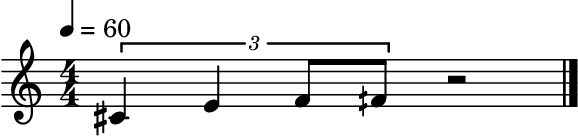

In [3]:
from maelzel import scoring
from maelzel.common import F
from maelzel.scorestruct import ScoreStruct

notes = [
    (61, F(2, 3)),
    (64, F(2, 3)),
    (65, F(1, 3)),
    (65.5, F(1, 3)),
]

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)

struct = ScoreStruct(timesig='4/4', tempo=60)

quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', divisionErrorWeight=0.05)
quantprofile.debug= True

qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

In [1]:
sco = r.quantizedScore.toCoreScore()
sco

NameError: name 'r' is not defined

# TODO

In [1]:
import logging
logging.basicConfig(level="DEBUG")
logging.getLogger("maelzel.scoring").setLevel(logging.DEBUG)

DEBUG:maelzel.scoring:mergeSiblings: Node(3/2, 
  «0.000:0.667 2/3♩ 3/2 4C»
  Node(5/4, 
    «0.667:0.800 2/15♩ 3/2,5/4 4D#»
    «0.800:0.933 2/15♩ 3/2,5/4 4E»
    «0.933:1.000 1/15♩ 3/2,5/4 4F tiedNext»
  )
) cannot merge with Node(3/2, 
  Node(5/4, 
    «1.000:1.133 2/15♩ 3/2,5/4 4F tiedPrev»
    «1.133:1.267 2/15♩ 3/2,5/4 4F#»
    «1.267:1.333 1/15♩ 3/2,5/4 4C# tiedNext»
  )
  «1.333:1.667 1/3♩ 3/2 4C# tiedPrev tiedNext»
  Node(5/4, 
    «1.667:1.933 4/15♩ 3/2,5/4 4C# tiedPrev»
    «1.933:2.000 1/15♩ 3/2,5/4 rest»
  )
): complex nested tuplets cannot merge: (3, 5)
DEBUG:maelzel.scoring:mergeSiblings: Node(3/2, 
  Node(5/4, 
    «1.000:1.133 2/15♩ 3/2,5/4 4F tiedPrev»
    «1.133:1.267 2/15♩ 3/2,5/4 4F#»
    «1.267:1.333 1/15♩ 3/2,5/4 4C# tiedNext»
  )
  «1.333:1.667 1/3♩ 3/2 4C# tiedPrev tiedNext»
  Node(5/4, 
    «1.667:1.933 4/15♩ 3/2,5/4 4C# tiedPrev»
    «1.933:2.000 1/15♩ 3/2,5/4 rest»
  )
) cannot merge with Node(1/1, 
  «2.000:3.000 1/1♩ rest»
): not same durRatio
DEBUG:maelze


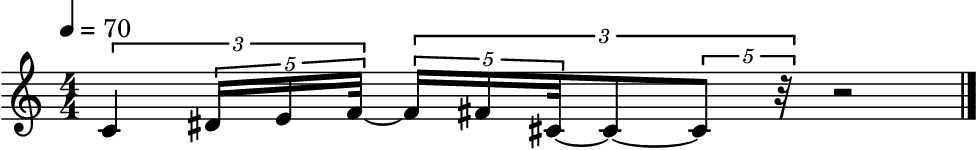

In [2]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2, 3)*F(3, 10)),
    (66, F(2, 3)*F(1, 5)),
    # (67, F(2, 3)*F(1, 5)),  
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.Part(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.debug = False
#quantprofile.rhythmComplexityWeight = 0.001
#quantprofile.allowedTupletsAcrossBeat = (3, 5)
# quantprofile.minBeatFractionAcrossBeats = 1/8
#quantprofile.minSymbolicDurationAcrossBeat = F(1, 3)

# quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

In [3]:
score.parts[0].dump()

Measure #0
  Timesig: 4/4 (quarter=70)
  Node ratio: 1/1, offset=0, end=4
    Node ratio: 3/2, offset=0, end=2
      «0.000:0.667 2/3♩ 3/2 4C»
      Node ratio: 5/4, offset=2/3, end=4/3
        «0.667:0.800 2/15♩ 3/2,5/4 4D#»
        «0.800:0.933 2/15♩ 3/2,5/4 4E»
        «0.933:1.133 1/5♩ 3/2,5/4 4F»
        «1.133:1.267 2/15♩ 3/2,5/4 4F#»
        «1.267:1.333 1/15♩ 3/2,5/4 4C# tiedNext»
      «1.333:1.667 1/3♩ 3/2 4C# tiedPrev tiedNext»
      Node ratio: 5/4, offset=5/3, end=2
        «1.667:1.933 4/15♩ 3/2,5/4 4C# tiedPrev»
        «1.933:2.000 1/15♩ 3/2,5/4 rest»
    Node ratio: 1/1, offset=2, end=4
      «2.000:4.000 2/1♩ rest»


In [10]:
quantprofile.debug  = False
%prun scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)


         205073 function calls (203456 primitive calls) in 0.131 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    27560    0.024    0.000    0.026    0.000 rational.py:120(__sub__)
     2158    0.015    0.000    0.067    0.000 quant.py:496(snapEventsToGrid)
        4    0.012    0.003    0.128    0.032 quant.py:967(quantizeBeatBinary)
     8632    0.011    0.000    0.034    0.000 misc.py:185(nearest_index)
     1998    0.010    0.000    0.013    0.000 quantutils.py:99(simplifyDivision)
     8632    0.006    0.000    0.006    0.000 {built-in method _bisect.bisect_right}
     6372    0.005    0.000    0.009    0.000 quant.py:274(divisionPenalty)
     2158    0.004    0.000    0.038    0.000 quant.py:471(<listcomp>)
    28555    0.003    0.000    0.003    0.000 {built-in method builtins.len}
    31584    0.003    0.000    0.003    0.000 {built-in method builtins.isinstance}
      199    0.003    0.000    0.010    0.000 quan

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.0016733,"(1, 1, 5)","[«0.000:0.667 2/3♩ 4C», «0.667:0.733 1/15♩ 4D#», «0.733:0.800 1/15♩ 4E», «0.800:1.000 1/5♩ 4F»]","[0, 2, 3, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0026315,"(1, 1, 1, 3, 1)","[«0.000:0.667 2/3♩ 4C», «0.667:0.733 1/15♩ 4D#», «0.733:0.800 1/15♩ 4E», «0.800:1.000 1/5♩ 4F»]","[0, 4, 5, 6]","gridError=0, rhythmComplexity=0.0791 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0561 (0.0001122, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.053797,"(1, 1, 9)","[«0.000:0.667 2/3♩ 4C», «0.667:0.741 2/27♩ 4D#», «0.741:0.815 2/27♩ 4E», «0.815:1.000 5/27♩ 4F»]","[0, 2, 4, 6]","gridError=0.0537, rhythmComplexity=0.237 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.066188,"(1, 1, 8)","[«0.000:0.667 2/3♩ 4C», «0.667:0.750 1/12♩ 4D#», «0.750:0.792 1/24♩ 4E», «0.792:1.000 5/24♩ 4F»]","[0, 2, 4, 5]","gridError=0.0661, rhythmComplexity=0.237 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.069741,"(1, 1, 1, 5, 1)","[«0.000:0.680 17/25♩ 4C», «0.680:0.720 1/25♩ 4D#», «0.720:0.800 2/25♩ 4E», «0.800:1.000 1/5♩ 4F»]","[0, 5, 6, 8]","gridError=0.0696, rhythmComplexity=0.25 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.06 (0.00012, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.073615,"(1, 1, 7)","[«0.000:0.667 2/3♩ 4C», «0.667:0.714 1/21♩ 4D#», «0.714:0.810 2/21♩ 4E», «0.810:1.000 4/21♩ 4F»]","[0, 2, 3, 5]","gridError=0.0736, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.074333,"(1, 1, 6)","[«0.000:0.667 2/3♩ 4C», «0.667:0.722 1/18♩ 4D#», «0.722:0.778 1/18♩ 4E», «0.778:1.000 2/9♩ 4F»]","[0, 2, 3, 4]","gridError=0.0743, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.083312,"(1, 1, 1, 4, 1)","[«0.000:0.650 13/20♩ 4C», «0.650:0.750 1/10♩ 4D#», «0.750:0.800 1/20♩ 4E», «0.800:1.000 1/5♩ 4F»]","[0, 4, 6, 7]","gridError=0.0833, rhythmComplexity=0.25 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10281,"(1, 1, 4)","[«0.000:0.667 2/3♩ 4C», «0.667:0.750 1/12♩ 4D#», «0.750:0.833 1/12♩ 4E», «0.833:1.000 1/6♩ 4F»]","[0, 2, 3, 4]","gridError=0.103, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11051,"(1, 1, 3)","[«0.000:0.667 2/3♩ 4C», «0.667:0.778 1/9♩ 4D#», «0.778:grace 4E properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «0.778:1.000 2/9♩ 4F»]","[0, 2, 3, 3]","gridError=0.111, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 25 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.0016733,"(5, 1, 1)","[«0.000:0.067 1/15♩ 4F#», «0.067:0.133 1/15♩ 4D#», «0.133:0.200 1/15♩ 4E», «0.200:0.333 2/15♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 1, 2, 3, 5]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0038177,"(3, 3, 1, 1, 1)","[«0.000:0.067 1/15♩ 4F#», «0.067:0.133 1/15♩ 4D#», «0.133:0.200 1/15♩ 4E», «0.200:0.333 2/15♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 1, 2, 3, 5]","gridError=0, rhythmComplexity=0.0632 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0842 (0.0001684, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.047982,"(3, 4, 1, 1, 1)","[«0.000:0.067 1/15♩ 4F#», «0.067:0.133 1/15♩ 4D#», «0.133:0.200 1/15♩ 4E», «0.200:0.350 3/20♩ 4F», «0.350:1.000 13/20♩ 4C#»]","[0, 1, 2, 3, 6]","gridError=0.0478, rhythmComplexity=0.2 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.0765 (0.000153, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.08326,"(8, 1, 1)","[«0.000:0.083 1/12♩ 4F#», «0.083:0.125 1/24♩ 4D#», «0.125:0.208 1/12♩ 4E», «0.208:0.333 1/8♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 2, 3, 5, 8]","gridError=0.0833, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.083296,"(3, 2, 1, 1, 1)","[«0.000:0.067 1/15♩ 4F#», «0.067:0.133 1/15♩ 4D#», «0.133:0.200 1/15♩ 4E», «0.200:0.300 1/10♩ 4F», «0.300:1.000 7/10♩ 4C#»]","[0, 1, 2, 3, 4]","gridError=0.0833, rhythmComplexity=0.0632 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0561 (0.0001122, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.083328,"(4, 3, 1, 1, 1)","[«0.000:0.050 1/20♩ 4F#», «0.050:0.150 1/10♩ 4D#», «0.150:0.200 1/20♩ 4E», «0.200:0.333 2/15♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 1, 3, 4, 6]","gridError=0.0833, rhythmComplexity=0.0632 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0765 (0.000153, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.08448,"(9, 1, 1)","[«0.000:0.074 2/27♩ 4F#», «0.074:0.148 2/27♩ 4D#», «0.148:0.185 1/27♩ 4E», «0.185:0.333 4/27♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 2, 4, 5, 9]","gridError=0.0845, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.092657,"(7, 1, 1)","[«0.000:0.048 1/21♩ 4F#», «0.048:0.143 2/21♩ 4D#», «0.143:0.190 1/21♩ 4E», «0.190:0.333 1/7♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 1, 3, 4, 7]","gridError=0.0926, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1028,"(5, 4, 1, 1, 1)","[«0.000:0.080 2/25♩ 4F#», «0.080:0.120 1/25♩ 4D#», «0.120:0.200 2/25♩ 4E», «0.200:0.350 3/20♩ 4F», «0.350:1.000 13/20♩ 4C#»]","[0, 2, 3, 5, 8]","gridError=0.103, rhythmComplexity=0.2 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.09 (0.00018, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10906,"(4, 5, 1, 1, 1)","[«0.000:0.050 1/20♩ 4F#», «0.050:0.150 1/10♩ 4D#», «0.150:0.200 1/20♩ 4E», «0.200:0.320 3/25♩ 4F», «0.320:1.000 17/25♩ 4C#»]","[0, 1, 3, 4, 7]","gridError=0.109, rhythmComplexity=0.2 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.09 (0.00018, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


DEBUG:maelzel.scoring:mergeSiblings: Node(3/2, 
  «0.000:0.667 2/3♩ 3/2 4C»
  Node(5/4, 
    «0.667:0.733 1/15♩ 3/2,5/4 4D#»
    «0.733:0.800 1/15♩ 3/2,5/4 4E»
    «0.800:1.000 1/5♩ 3/2,5/4 4F»
  )
) cannot merge with Node(3/2, 
  Node(5/4, 
    «1.000:1.067 1/15♩ 3/2,5/4 4F#»
    «1.067:1.133 1/15♩ 3/2,5/4 4D#»
    «1.133:1.200 1/15♩ 3/2,5/4 4E»
    «1.200:1.333 2/15♩ 3/2,5/4 4F»
  )
  «1.333:2.000 2/3♩ 3/2 4C#»
): complex nested tuplets cannot merge: (3, 5)
DEBUG:maelzel.scoring:mergeSiblings: Node(3/2, 
  Node(5/4, 
    «1.000:1.067 1/15♩ 3/2,5/4 4F#»
    «1.067:1.133 1/15♩ 3/2,5/4 4D#»
    «1.133:1.200 1/15♩ 3/2,5/4 4E»
    «1.200:1.333 2/15♩ 3/2,5/4 4F»
  )
  «1.333:2.000 2/3♩ 3/2 4C#»
) cannot merge with Node(1/1, 
  «2.000:3.000 1/1♩ rest»
): not same durRatio
DEBUG:maelzel.scoring:Nodes can merge: 
    Node(1/1, 
  «2.000:3.000 1/1♩ rest»
)
    Node(1/1, 
  «3.000:4.000 1/1♩ rest»
)
DEBUG:maelzel.scoring:This Node (offset: 0, end: 4) does not contain offset 0
DEBUG:maelzel.scor


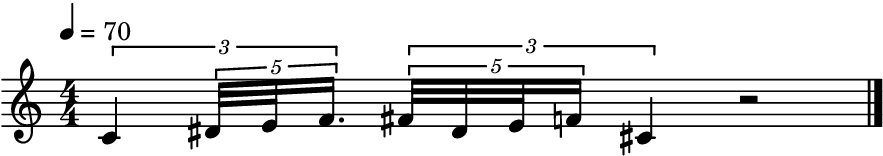

In [6]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 10)),
    (64, F(2, 3)*F(1, 10)),
    (65, F(2, 3)*F(3, 10)),
    
    (66, F(2, 3)*F(1, 10)),
    (63, F(2, 3)*F(1, 10)),
    (64, F(2, 3)*F(1, 10)),
    (65, F(2, 3)*F(2, 10)),
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.Part(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
#quantprofile.rhythmComplexityWeight = 0.001
#quantprofile.divisionErrorWeight = 0.01
quantprofile.minBeatFractionAcrossBeats = F(1, 8)
quantprofile.minSymbolicDurationAcrossBeat = F(1, 3)

qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

Beat: 0 - 1 (dur: 1)
Skipped 1088 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.0018974,"(8, 8)","[«0.000:0.250 1/4♩ 4C», «0.250:0.438 3/16♩ 4D#», «0.438:0.625 3/16♩ 4E», «0.625:0.812 3/16♩ 4F», «0.812:1.000 3/16♩ 4F#»]","[0, 4, 7, 10, 13]","gridError=0, rhythmComplexity=0.0632 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0029665,"(1, 4, 2, 4)","[«0.000:0.250 1/4♩ 4C», «0.250:0.438 3/16♩ 4D#», «0.438:0.625 3/16♩ 4E», «0.625:0.812 3/16♩ 4F», «0.812:1.000 3/16♩ 4F#»]","[0, 1, 4, 6, 8]","gridError=0, rhythmComplexity=0.126 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.06 (0.00012, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.029419,"(1, 7, 2, 4)","[«0.000:0.250 1/4♩ 4C», «0.250:0.429 5/28♩ 4D#», «0.429:0.625 11/56♩ 4E», «0.625:0.812 3/16♩ 4F», «0.812:1.000 3/16♩ 4F#»]","[0, 1, 6, 9, 11]","gridError=0.029, rhythmComplexity=0.4 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.06 (0.00012, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.029419,"(1, 4, 2, 7)","[«0.000:0.250 1/4♩ 4C», «0.250:0.438 3/16♩ 4D#», «0.438:0.625 3/16♩ 4E», «0.625:0.821 11/56♩ 4F», «0.821:1.000 5/28♩ 4F#»]","[0, 1, 4, 6, 9]","gridError=0.029, rhythmComplexity=0.4 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.06 (0.00012, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.035722,"(4, 9, 9)","[«0.000:0.250 1/4♩ 4C», «0.250:0.444 7/36♩ 4D#», «0.444:0.630 5/27♩ 4E», «0.630:0.815 5/27♩ 4F», «0.815:1.000 5/27♩ 4F#»]","[0, 3, 7, 12, 17]","gridError=0.0351, rhythmComplexity=0.583 (numNotesAcrossSubdics=2, numTies=3), divPenalty=0.06 (0.00012, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.038103,"(1, 4, 2, 5)","[«0.000:0.250 1/4♩ 4C», «0.250:0.438 3/16♩ 4D#», «0.438:0.625 3/16♩ 4E», «0.625:0.800 7/40♩ 4F», «0.800:1.000 1/5♩ 4F#»]","[0, 1, 4, 6, 8]","gridError=0.038, rhythmComplexity=0.126 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.06 (0.00012, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.038103,"(1, 5, 2, 4)","[«0.000:0.250 1/4♩ 4C», «0.250:0.450 1/5♩ 4D#», «0.450:0.625 7/40♩ 4E», «0.625:0.812 3/16♩ 4F», «0.812:1.000 3/16♩ 4F#»]","[0, 1, 5, 7, 9]","gridError=0.038, rhythmComplexity=0.126 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.06 (0.00012, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.038805,"(4, 9, 7)","[«0.000:0.250 1/4♩ 4C», «0.250:0.444 7/36♩ 4D#», «0.444:0.630 5/27♩ 4E», «0.630:0.810 0.180♩ 4F», «0.810:1.000 4/21♩ 4F#»]","[0, 3, 7, 12, 16]","gridError=0.0385, rhythmComplexity=0.4 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.0678 (0.0001356, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.043133,"(4, 7, 7)","[«0.000:0.250 1/4♩ 4C», «0.250:0.429 5/28♩ 4D#», «0.429:0.619 4/21♩ 4E», «0.619:0.810 4/21♩ 4F», «0.810:1.000 4/21♩ 4F#»]","[0, 3, 6, 10, 14]","gridError=0.043, rhythmComplexity=0.228 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0678 (0.0001356, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.044088,"(4, 7, 9)","[«0.000:0.250 1/4♩ 4C», «0.250:0.429 5/28♩ 4D#», «0.429:0.619 4/21♩ 4E», «0.619:0.815 0.196♩ 4F», «0.815:1.000 5/27♩ 4F#»]","[0, 3, 6, 10, 15]","gridError=0.0436, rhythmComplexity=0.583 (numNotesAcrossSubdics=2, numTies=3), divPenalty=0.0678 (0.0001356, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 11 divisions: 


error,div,makeSnappedNotation,slots,info
0.0053104,"(4, 1, 1, 1)","[«0.000:0.188 3/16♩ 4G», «0.188:1.000 13/16♩ 4C tiedNext»]","[0, 3]","gridError=0, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.021241,"(11,)","[«0.000:0.182 2/11♩ 4G», «0.182:1.000 9/11♩ 4C tiedNext»]","[0, 2]","gridError=0.0202, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.030627,"(7, 1, 1, 1)","[«0.000:0.179 5/28♩ 4G», «0.179:1.000 23/28♩ 4C tiedNext»]","[0, 5]","gridError=0.029, rhythmComplexity=0.962 (numNotesAcrossSubdics=1, numTies=2), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.037998,"(5,)","[«0.000:0.200 1/5♩ 4G», «0.200:1.000 4/5♩ 4C tiedNext»]","[0, 1]","gridError=0.038, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.038062,"(5, 1, 1, 1)","[«0.000:0.200 1/5♩ 4G», «0.200:1.000 4/5♩ 4C tiedNext»]","[0, 4]","gridError=0.038, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.057367,"(6,)","[«0.000:0.167 1/6♩ 4G», «0.167:1.000 5/6♩ 4C tiedNext»]","[0, 1]","gridError=0.0572, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.057388,"(3, 1, 1, 1)","[«0.000:0.167 1/6♩ 4G», «0.167:1.000 5/6♩ 4C tiedNext»]","[0, 2]","gridError=0.0572, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.086024,"(9,)","[«0.000:0.222 2/9♩ 4G», «0.222:1.000 7/9♩ 4C tiedNext»]","[0, 2]","gridError=0.086, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10518,"(7,)","[«0.000:0.143 1/7♩ 4G», «0.143:1.000 6/7♩ 4C tiedNext»]","[0, 1]","gridError=0.105, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.13766,"(8,)","[«0.000:0.125 1/8♩ 4G», «0.125:1.000 7/8♩ 4C tiedNext»]","[0, 1]","gridError=0.138, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 11 divisions: 


error,div,makeSnappedNotation,slots,info
0.0053104,"(4, 1, 1, 1)","[«0.000:0.188 3/16♩ 4C tiedPrev», «0.188:1.000 13/16♩ rest»]","[0, 3]","gridError=0, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.017551,"(11,)","[«0.000:0.182 2/11♩ 4C tiedPrev», «0.182:1.000 9/11♩ rest»]","[0, 2]","gridError=0.0163, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.025357,"(7, 1, 1, 1)","[«0.000:0.179 5/28♩ 4C tiedPrev», «0.179:1.000 23/28♩ rest»]","[0, 5]","gridError=0.0234, rhythmComplexity=0.962 (numNotesAcrossSubdics=1, numTies=2), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.030633,"(5,)","[«0.000:0.200 1/5♩ 4C tiedPrev», «0.200:1.000 4/5♩ rest»]","[0, 1]","gridError=0.0306, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.030713,"(5, 1, 1, 1)","[«0.000:0.200 1/5♩ 4C tiedPrev», «0.200:1.000 4/5♩ rest»]","[0, 4]","gridError=0.0306, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.046329,"(6,)","[«0.000:0.167 1/6♩ 4C tiedPrev», «0.167:1.000 5/6♩ rest»]","[0, 1]","gridError=0.0461, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.046356,"(3, 1, 1, 1)","[«0.000:0.167 1/6♩ 4C tiedPrev», «0.167:1.000 5/6♩ rest»]","[0, 2]","gridError=0.0461, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.069342,"(9,)","[«0.000:0.222 2/9♩ 4C tiedPrev», «0.222:1.000 7/9♩ rest»]","[0, 2]","gridError=0.0693, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.084782,"(7,)","[«0.000:0.143 1/7♩ 4C tiedPrev», «0.143:1.000 6/7♩ rest»]","[0, 1]","gridError=0.0848, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11097,"(8,)","[«0.000:0.125 1/8♩ 4C tiedPrev», «0.125:1.000 7/8♩ rest»]","[0, 1]","gridError=0.111, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


DEBUG:maelzel.scoring:Nodes can merge: 
    Node(1/1, 
  «0.000:0.250 1/4♩ 4C»
  «0.250:0.438 3/16♩ 4D#»
  «0.438:0.625 3/16♩ 4E»
  «0.625:0.812 3/16♩ 4F»
  «0.812:1.000 3/16♩ 4F#»
)
    Node(1/1, 
  «1.000:1.188 3/16♩ 4G»
  «1.188:1.250 1/16♩ 4C tiedNext»
  «1.250:2.000 3/4♩ 4C tiedPrev tiedNext»
)
DEBUG:maelzel.scoring:Nodes can merge: 
    Node(1/1, 
  «0.000:0.250 1/4♩ 4C»
  «0.250:0.438 3/16♩ 4D#»
  «0.438:0.625 3/16♩ 4E»
  «0.625:0.812 3/16♩ 4F»
  «0.812:1.000 3/16♩ 4F#»
  «1.000:1.188 3/16♩ 4G»
  «1.188:1.250 1/16♩ 4C tiedNext»
  «1.250:2.000 3/4♩ 4C tiedPrev tiedNext»
)
    Node(1/1, 
  «2.000:2.188 3/16♩ 4C tiedPrev»
  «2.188:2.250 1/16♩ rest»
  «2.250:3.000 3/4♩ rest»
)
DEBUG:maelzel.scoring:Nodes can merge: 
    Node(1/1, 
  «0.000:0.250 1/4♩ 4C»
  «0.250:0.438 3/16♩ 4D#»
  «0.438:0.625 3/16♩ 4E»
  «0.625:0.812 3/16♩ 4F»
  «0.812:1.000 3/16♩ 4F#»
  «1.000:1.188 3/16♩ 4G»
  «1.188:1.250 1/16♩ 4C tiedNext»
  «1.250:2.000 3/4♩ 4C tiedPrev tiedNext»
  «2.000:2.188 3/16♩ 4C tiedP


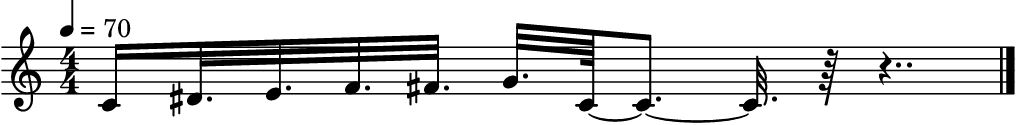

In [8]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(1, 4)),
    (63, F(1, 4)*F(3, 4)),
    (64, F(1, 4)*F(3, 4)),
    (65, F(1, 4)*F(3, 4)),
    (66, F(1, 4)*F(3, 4)),
    (67, F(1, 4)*F(3, 4)),
    (60, F(1)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.Part(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

DEBUG:maelzel.scoring:Nodes can merge: 
    Node(1/1, 
  «0.000:0.250 1/4♩ 4C tiedNext spanners=[Slur(kind=start, uuid=4pff36ua)]»
  «0.250:0.750 1/2♩ 4C gliss»
  «0.750:1.000 1/4♩ 4F spanners=[Slur(kind=end, uuid=4pff36ua)]»
)
    Node(1/1, 
  «1.000:2.000 1/1♩ rest»
)
DEBUG:maelzel.scoring:Nodes can merge: 
    Node(1/1, 
  «0.000:0.250 1/4♩ 4C tiedNext spanners=[Slur(kind=start, uuid=4pff36ua)]»
  «0.250:0.750 1/2♩ 4C gliss»
  «0.750:1.000 1/4♩ 4F spanners=[Slur(kind=end, uuid=4pff36ua)]»
  «1.000:2.000 1/1♩ rest»
)
    Node(1/1, 
  «2.000:3.000 1/1♩ rest»
)
DEBUG:maelzel.scoring:Nodes can merge: 
    Node(1/1, 
  «0.000:0.250 1/4♩ 4C tiedNext spanners=[Slur(kind=start, uuid=4pff36ua)]»
  «0.250:0.750 1/2♩ 4C gliss»
  «0.750:1.000 1/4♩ 4F spanners=[Slur(kind=end, uuid=4pff36ua)]»
  «1.000:3.000 2/1♩ rest»
)
    Node(1/1, 
  «3.000:4.000 1/1♩ rest»
)
DEBUG:maelzel.scoring:This Node (offset: 0, end: 4) does not contain offset 0
DEBUG:maelzel.scoring:Rendering lilypond '/tmp/tmp7msjbgx

Part #0:
  Measure #0
    Timesig: 4/4 (quarter=70)
    Node ratio: 1/1, offset=0, end=4
      Node ratio: 1/1, offset=0, end=4
        «0.000:0.250 1/4♩ 4C tiedNext spanners=[Slur(kind=start, uuid=4pff36ua)]»
        «0.250:0.750 1/2♩ 4C gliss»
        «0.750:1.000 1/4♩ 4F spanners=[Slur(kind=end, uuid=4pff36ua)]»
        «1.000:4.000 3/1♩ rest»


DEBUG:maelzel:lilypond executed OK
DEBUG:maelzel:stderr: 
DEBUG:maelzel: Changing working directory to: `/tmp'
 Processing `/tmp/tmp7msjbgx0.ly'
 Parsing...
 Interpreting music...
 Preprocessing graphical objects...
 Finding the ideal number of pages...
 Fitting music on 1 page...
 Drawing systems...
 Converting to PNG...
 Layout output to `tmp7msjbgx0.cropped.eps'...
 Converting to PNG...
 Success: compilation successfully completed

DEBUG:maelzel.scoring:Found crop file /tmp/tmp7msjbgx0.cropped.png, using that as output
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'iCCP' 41 2354
DEBUG:PIL.PngImagePlugin:iCCP profile name b'default_rgb.icc'
DEBUG:PIL.PngImagePlugin:Compression method 0
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 2407 9
DEBUG:PIL.PngImagePlugin:STREAM b'tEXt' 2428 31
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 2471 6354



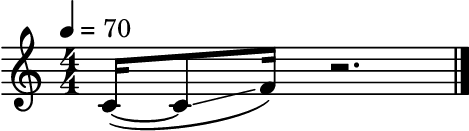

In [10]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(1, 4), tiedNext=True),
    makeNote(60, F(1, 4), tiedNext=True, gliss=True),
    makeNote(60, F(1, 4), tiedPrev=True),
    makeNote(65, F(1, 4))
]

notes[0].addSpanner(spanner.Slur(), notes[-1])
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.Part(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
score.dump()
r # .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Skipped 8 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.002,"(8,)","[«0.000:0.375 3/8♩ 4D», «0.375:0.750 3/8♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 3, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0038873,"(4, 2)","[«0.000:0.375 3/8♩ 4D», «0.375:0.750 3/8♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 3, 5]","gridError=0, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0069602,"(1, 2, 1, 1)","[«0.000:0.375 3/8♩ 4D», «0.375:0.750 3/8♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 2, 4]","gridError=0, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0077746,"(1, 8, 4)","[«0.000:0.375 3/8♩ 4D», «0.375:0.750 3/8♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 2, 10]","gridError=0, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.01077,"(1, 1, 4, 1, 2, 1)","[«0.000:0.375 3/8♩ 4D», «0.375:0.750 3/8♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 3, 8]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.021001,"(1, 7, 4)","[«0.000:0.381 8/21♩ 4D», «0.381:0.750 31/84♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 2, 9]","gridError=0.0165, rhythmComplexity=0.38 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.032039,"(11, 2)","[«0.000:0.364 4/11♩ 4D», «0.364:0.750 17/44♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 8, 12]","gridError=0.0286, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.1 (0.001, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.035693,"(9, 2)","[«0.000:0.389 7/18♩ 4D», «0.389:0.750 13/36♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 7, 10]","gridError=0.0339, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.036281,"(1, 6, 4)","[«0.000:0.389 7/18♩ 4D», «0.389:0.750 13/36♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 2, 8]","gridError=0.0339, rhythmComplexity=0.38 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.036769,"(1, 8, 7)","[«0.000:0.375 3/8♩ 4D», «0.375:0.762 0.387♩ 4C», «0.762:1.000 5/21♩ 4D tiedNext»]","[0, 2, 11]","gridError=0.0297, rhythmComplexity=0.667 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"


Beat: 1 - 3/2 (dur: 1/2)
Skipped 0 divisions with a div. penalty > 0.1
Best 10 divisions: 


error,div,makeSnappedNotation,slots,info
0.002,"(4,)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.005,"(2, 1)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C»]","[0, 1]","gridError=0, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0053852,"(4, 1, 1)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C»]","[0, 3]","gridError=0, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.061174,"(9,)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.500 7/18♩ 4C»]","[0, 2]","gridError=0.061, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.061321,"(3, 1, 1)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.500 7/18♩ 4C»]","[0, 2]","gridError=0.061, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.07708,"(7,)","[«0.000:0.143 1/7♩ 4D tiedPrev», «0.143:0.500 5/14♩ 4C»]","[0, 2]","gridError=0.0756, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10062,"(5,)","[«0.000:0.100 1/10♩ 4D tiedPrev», «0.100:0.500 2/5♩ 4C»]","[0, 1]","gridError=0.101, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10075,"(5, 1)","[«0.000:0.100 1/10♩ 4D tiedPrev», «0.100:0.500 2/5♩ 4C»]","[0, 2]","gridError=0.101, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.15531,"(3,)","[«0.000:0.167 1/6♩ 4D tiedPrev», «0.167:0.500 1/3♩ 4C»]","[0, 1]","gridError=0.155, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.15539,"(3, 1)","[«0.000:0.167 1/6♩ 4D tiedPrev», «0.167:0.500 1/3♩ 4C»]","[0, 2]","gridError=0.155, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 3/2 - 5/2 (dur: 1)
Skipped 158 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.0052001,"(5, 5, 2)","[«0.000:0.133 2/15♩ 4C#», «0.133:0.267 2/15♩ 4D», «0.267:0.400 2/15♩ 4D#», «0.400:0.533 2/15♩ 4E», «0.533:0.667 2/15♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 2, 4, 6, 8, 10, 11]","gridError=0, rhythmComplexity=0.0452 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.049749,"(8, 5, 2)","[«0.000:0.125 1/8♩ 4C#», «0.125:0.250 1/8♩ 4D», «0.250:0.400 3/20♩ 4D#», «0.400:0.533 2/15♩ 4E», «0.533:0.667 2/15♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 3, 6, 9, 11, 13, 14]","gridError=0.0495, rhythmComplexity=0.0452 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.049749,"(5, 8, 2)","[«0.000:0.133 2/15♩ 4C#», «0.133:0.267 2/15♩ 4D», «0.267:0.417 3/20♩ 4D#», «0.417:0.542 1/8♩ 4E», «0.542:0.667 1/8♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 2, 4, 7, 10, 13, 14]","gridError=0.0495, rhythmComplexity=0.0452 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.053984,"(5, 5, 7)","[«0.000:0.133 2/15♩ 4C#», «0.133:0.267 2/15♩ 4D», «0.267:0.400 2/15♩ 4D#», «0.400:0.533 2/15♩ 4E», «0.533:0.667 2/15♩ 4F», «0.667:0.857 4/21♩ 4F#», «0.857:1.000 1/7♩ 4G»]","[0, 2, 4, 6, 8, 10, 14]","gridError=0.0535, rhythmComplexity=0.0452 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0671 (0.0006708, divPenalty=0.06, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0.03)"
0.055667,"(7, 5, 2)","[«0.000:0.143 1/7♩ 4C#», «0.143:0.286 1/7♩ 4D», «0.286:0.400 4/35♩ 4D#», «0.400:0.533 2/15♩ 4E», «0.533:0.667 2/15♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 3, 6, 8, 10, 12, 13]","gridError=0.0554, rhythmComplexity=0.0452 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0.03)"
0.055667,"(5, 7, 2)","[«0.000:0.133 2/15♩ 4C#», «0.133:0.267 2/15♩ 4D», «0.267:0.381 4/35♩ 4D#», «0.381:0.524 1/7♩ 4E», «0.524:0.667 1/7♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 2, 4, 6, 9, 12, 13]","gridError=0.0554, rhythmComplexity=0.0452 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0.03)"
0.065496,"(2, 5, 6, 3)","[«0.000:0.125 1/8♩ 4C#», «0.125:0.250 1/8♩ 4D», «0.250:0.400 3/20♩ 4D#», «0.400:0.542 0.142♩ 4E», «0.542:0.667 1/8♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 1, 2, 5, 8, 11, 14]","gridError=0.065, rhythmComplexity=0.163 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.06 (0.0006, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.071593,"(5, 6, 2)","[«0.000:0.133 2/15♩ 4C#», «0.133:0.267 2/15♩ 4D», «0.267:0.389 11/90♩ 4D#», «0.389:0.556 1/6♩ 4E», «0.556:0.667 1/9♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 2, 4, 6, 9, 11, 12]","gridError=0.0713, rhythmComplexity=0.143 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.071593,"(6, 5, 2)","[«0.000:0.111 1/9♩ 4C#», «0.111:0.278 1/6♩ 4D», «0.278:0.400 11/90♩ 4D#», «0.400:0.533 2/15♩ 4E», «0.533:0.667 2/15♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 2, 5, 7, 9, 11, 12]","gridError=0.0713, rhythmComplexity=0.143 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.071604,"(5, 5, 5)","[«0.000:0.133 2/15♩ 4C#», «0.133:0.267 2/15♩ 4D», «0.267:0.400 2/15♩ 4D#», «0.400:0.533 2/15♩ 4E», «0.533:0.667 2/15♩ 4F», «0.667:0.800 2/15♩ 4F#», «0.800:1.000 1/5♩ 4G»]","[0, 2, 4, 6, 8, 10, 12]","gridError=0.0713, rhythmComplexity=0.0452 (numNotesAcrossSubdics=1, numTies=0), divPen

Beat: 1 - 2 (dur: 1)
Skipped 37 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.039078,"(8, 8, 7)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.625 1/8♩ 4C#», «0.625:0.762 0.137♩ 4D», «0.762:0.905 1/7♩ 4D#», «0.905:1.000 2/21♩ 4E tiedNext»]","[0, 3, 12, 15, 18, 21]","gridError=0.038, rhythmComplexity=0.19 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0671 (0.0006708, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.049666,"(2, 1, 2, 5)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.625 1/8♩ 4C#», «0.625:0.750 1/8♩ 4D», «0.750:0.900 3/20♩ 4D#», «0.900:1.000 1/10♩ 4E tiedNext»]","[0, 1, 3, 4, 5, 8]","gridError=0.0495, rhythmComplexity=0.0527 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.055692,"(5, 8, 7)","[«0.000:0.133 2/15♩ 4D tiedPrev», «0.133:0.500 11/30♩ 4C», «0.500:0.625 1/8♩ 4C#», «0.625:0.762 0.137♩ 4D», «0.762:0.905 1/7♩ 4D#», «0.905:1.000 2/21♩ 4E tiedNext»]","[0, 2, 9, 12, 15, 18]","gridError=0.0543, rhythmComplexity=0.333 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.0671 (0.0006708, divPenalty=0.06, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0.03)"
0.064282,"(4, 1, 1, 4, 2, 3)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.625 1/8♩ 4C#», «0.625:0.750 1/8♩ 4D», «0.750:0.889 5/36♩ 4D#», «0.889:1.000 1/9♩ 4E tiedNext»]","[0, 3, 6, 9, 11, 13]","gridError=0.0635, rhythmComplexity=0.224 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0671 (0.0006708, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.06513,"(3, 8, 7)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.500 7/18♩ 4C», «0.500:0.625 1/8♩ 4C#», «0.625:0.762 0.137♩ 4D», «0.762:0.905 1/7♩ 4D#», «0.905:1.000 2/21♩ 4E tiedNext»]","[0, 1, 7, 10, 13, 16]","gridError=0.0647, rhythmComplexity=0.19 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.065284,"(8, 6, 7)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.611 1/9♩ 4C#», «0.611:0.762 0.151♩ 4D», «0.762:0.905 1/7♩ 4D#», «0.905:1.000 2/21♩ 4E tiedNext»]","[0, 3, 11, 13, 16, 19]","gridError=0.0647, rhythmComplexity=0.19 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0671 (0.0006708, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.066654,"(8, 8, 3)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.625 1/8♩ 4C#», «0.625:0.778 11/72♩ 4D», «0.778:0.889 1/9♩ 4D#», «0.889:1.000 1/9♩ 4E tiedNext»]","[0, 3, 12, 15, 17, 18]","gridError=0.0662, rhythmComplexity=0.19 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.066908,"(4, 1, 1, 4, 3, 3)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.625 1/8♩ 4C#», «0.625:0.778 11/72♩ 4D», «0.778:0.889 1/9♩ 4D#», «0.889:1.000 1/9♩ 4E tiedNext»]","[0, 3, 6, 9, 12, 14]","gridError=0.0662, rhythmComplexity=0.224 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0671 (0.0006708, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.069453,"(4, 1, 1, 4, 3, 2)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.625 1/8♩ 4C#», «0.625:0.778 11/72♩ 4D», «0.778:0.917 5/36♩ 4D#», «0.917:1.000 1/12♩ 4E tiedNext»]","[0, 3, 6, 9, 12, 14]","gridError=0.0682, rhythmComplexity=0.354 (numNotesAcrossSubdics=3, numTies=2), divPenalty=0.0671 (0.0006708, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.071547,"(2, 1, 5, 5)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.650 3/20♩ 4C#», «0.650:0.750 1/10♩ 4D», «0.750:0.900 3/20♩ 4D#», «0.900:1.000 1/10♩ 4E tiedNext»]","[0, 1, 3, 6, 8, 11]","gridError=0.0713, rhythmComplexity=0.0527 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.06 (0.0006, divPenalty=0.06, cardinalityPenalty=0, 

Beat: 2 - 5/2 (dur: 1/2)
Skipped 0 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.039593,"(4, 1, 1)","[«0.000:0.042 1/24♩ 4E tiedPrev», «0.042:0.167 1/8♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 1, 4, 5]","gridError=0.0395, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.039672,"(6, 3)","[«0.000:0.042 1/24♩ 4E tiedPrev», «0.042:0.167 1/8♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 1, 4, 7]","gridError=0.0395, rhythmComplexity=0.0791 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.040297,"(3, 3, 3, 1)","[«0.000:0.042 1/24♩ 4E tiedPrev», «0.042:0.167 1/8♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 1, 4, 8]","gridError=0.0395, rhythmComplexity=0.237 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.091069,"(3, 1, 1)","[«0.000:0.056 1/18♩ 4E tiedPrev», «0.056:0.167 1/9♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 1, 3, 4]","gridError=0.091, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.091108,"(9,)","[«0.000:0.056 1/18♩ 4E tiedPrev», «0.056:0.167 1/9♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 1, 3, 6]","gridError=0.091, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10099,"(6, 5)","[«0.000:0.042 1/24♩ 4E tiedPrev», «0.042:0.167 1/8♩ 4F», «0.167:0.350 11/60♩ 4F#», «0.350:0.500 3/20♩ 4G»]","[0, 1, 4, 8]","gridError=0.101, rhythmComplexity=0.25 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.10362,"(3, 2, 3, 1)","[«0.000:0.042 1/24♩ 4E tiedPrev», «0.042:0.188 7/48♩ 4F», «0.188:0.333 7/48♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 1, 4, 7]","gridError=0.103, rhythmComplexity=0.237 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10938,"(3,)","[«0.000:grace 4E tiedPrev properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 30)}», «0.000:0.167 1/6♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 0, 1, 2]","gridError=0.109, rhythmComplexity=0.237 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11479,"(6, 4)","[«0.000:0.042 1/24♩ 4E tiedPrev», «0.042:0.167 1/8♩ 4F», «0.167:0.312 7/48♩ 4F#», «0.312:0.500 3/16♩ 4G»]","[0, 1, 4, 7]","gridError=0.115, rhythmComplexity=0.0791 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11495,"(3, 3, 2, 1)","[«0.000:0.042 1/24♩ 4E tiedPrev», «0.042:0.167 1/8♩ 4F», «0.167:0.312 7/48♩ 4F#», «0.312:0.500 3/16♩ 4G»]","[0, 1, 4, 7]","gridError=0.115, rhythmComplexity=0.237 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Error: 0.006200078492343227, division: [Fraction(1, 2), Fraction(1, 1)]
Error: 0.05887492237155008, division: [Fraction(1, 1), Fraction(1, 2)]
Node(1/1, 
  «0.000:0.375 3/8♩ 4D»
  «0.375:0.750 3/8♩ 4C»
  «0.750:1.000 1/4♩ 4D tiedNext»
) Node(1/1, 
  «1.000:1.125 1/8♩ 4D tiedPrev»
  «1.125:1.500 3/8♩ 4C»
) acrossBeat=True, syncopated=True
Node(5/4, 
  «1.500:1.633 2/15♩ 3/2,5/4 4C#»
  «1.633:1.767 2/15♩ 3/2,5/4 4D»
  «1.767:1.833 1/15♩ 3/2,5/4 4D# tiedNext»
) Node(5/4, 
  «1.833:1.900 1/15♩ 3/2,5/4 4D# tiedPrev»
  «1.900:2.033 2/15♩ 3/2,5/4 4E»
  «2.033:2.167 2/15♩ 3/2,5/4 4F»
) acrossBeat=False, syncopated=True



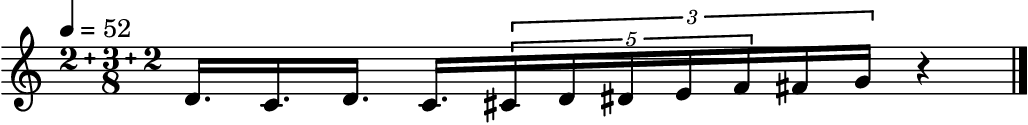

In [7]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    
    makeNote(61, F(2, 3)*F(1, 5)),
    makeNote(62, F(2, 3)*F(1, 5)),
    makeNote(63, F(2, 3)*F(1, 5)),
    makeNote(64, F(2, 3)*F(1, 5)),
    makeNote(65, F(2, 3)*F(1, 5)),
    makeNote(66, F(2, 3)*F(1, 4)),
    makeNote(67, F(2, 3)*F(1, 4)), 
    
]

struct = ScoreStruct(timesig='7/8', tempo=52)
struct.getMeasureDef(0).subdivisionStructure = (2, 3, 2)

part = scoring.Part(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.003,"(1, 1, 3)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0049103,"(1, 1, 1, 1, 1, 3)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 4, 6]","gridError=0, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0293,"(1, 1, 1, 3, 2)","[«0.000:0.667 2/3♩ 4C», «0.667:0.900 7/30♩ 4C#», «0.900:1.000 1/10♩ 4D tiedNext»]","[0, 4, 7]","gridError=0.028, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0541 (0.0005408, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.035368,"(1, 1, 8)","[«0.000:0.667 2/3♩ 4C», «0.667:0.875 5/24♩ 4C#», «0.875:1.000 1/8♩ 4D tiedNext»]","[0, 2, 7]","gridError=0.0339, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.035693,"(1, 1, 1, 1, 1, 4)","[«0.000:0.667 2/3♩ 4C», «0.667:0.875 5/24♩ 4C#», «0.875:1.000 1/8♩ 4D tiedNext»]","[0, 4, 6]","gridError=0.0339, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.035991,"(1, 1, 3, 2)","[«0.000:0.667 2/3♩ 4C», «0.667:0.875 5/24♩ 4C#», «0.875:1.000 1/8♩ 4D tiedNext»]","[0, 4, 6]","gridError=0.0339, rhythmComplexity=0.38 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.039397,"(1, 1, 7)","[«0.000:0.667 2/3♩ 4C», «0.667:0.905 5/21♩ 4C#», «0.905:1.000 2/21♩ 4D tiedNext»]","[0, 2, 7]","gridError=0.0379, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.050625,"(1, 1, 5)","[«0.000:0.667 2/3♩ 4C», «0.667:0.867 1/5♩ 4C#», «0.867:1.000 2/15♩ 4D tiedNext»]","[0, 2, 5]","gridError=0.0505, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.051577,"(1, 1, 1, 3, 3)","[«0.000:0.667 2/3♩ 4C», «0.667:0.867 1/5♩ 4C#», «0.867:1.000 2/15♩ 4D tiedNext»]","[0, 4, 7]","gridError=0.0505, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0811 (0.0008112, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.003,"(3, 1, 1)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.333 2/9♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.333 2/9♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0049103,"(3, 1, 1, 1, 1, 1)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.333 2/9♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 2, 4]","gridError=0, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0293,"(2, 3, 1, 1, 1)","[«0.000:0.100 1/10♩ 4D tiedPrev», «0.100:0.333 7/30♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 1, 4]","gridError=0.028, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0541 (0.0005408, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.035368,"(8, 1, 1)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.333 5/24♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 3, 8]","gridError=0.0339, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.035693,"(4, 1, 1, 1, 1, 1)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.333 5/24♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 3, 5]","gridError=0.0339, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.039397,"(7, 1, 1)","[«0.000:0.095 2/21♩ 4D tiedPrev», «0.095:0.333 5/21♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 2, 7]","gridError=0.0379, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.050625,"(5, 1, 1)","[«0.000:0.133 2/15♩ 4D tiedPrev», «0.133:0.333 1/5♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 2, 5]","gridError=0.0505, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.051577,"(3, 3, 1, 1, 1)","[«0.000:0.133 2/15♩ 4D tiedPrev», «0.133:0.333 1/5♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 2, 5]","gridError=0.0505, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0811 (0.0008112, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.061075,"(4, 1, 1)","[«0.000:0.083 1/12♩ 4D tiedPrev», «0.083:0.333 1/4♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 1, 4]","gridError=0.061, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Node(3/2, 
  «0.000:0.667 2/3♩ 3/2 4C»
  Node(3/2, 
    «0.667:0.889 2/9♩ 3/2,3/2 4C#»
    «0.889:1.000 1/9♩ 3/2,3/2 4D tiedNext»
  )
) Node(3/2, 
  Node(3/2, 
    «1.000:1.111 1/9♩ 3/2,3/2 4D tiedPrev»
    «1.111:1.333 2/9♩ 3/2,3/2 4D#»
  )
  «1.333:2.000 2/3♩ 3/2 4E»
) acrossBeat=True, syncopated=True
Node(3/2, 
  «0.667:0.889 2/9♩ 3/2,3/2 4C#»
  «0.889:1.000 1/9♩ 3/2,3/2 4D tiedNext»
) Node(3/2, 
  «1.000:1.111 1/9♩ 3/2,3/2 4D tiedPrev»
  «1.111:1.333 2/9♩ 3/2,3/2 4D#»
) acrossBeat=True, syncopated=True
Node(3/2, 
  «0.667:0.889 2/9♩ 3/2,3/2 4C#»
  «0.889:1.000 1/9♩ 3/2,3/2 4D tiedNext»
) Node(3/2, 
  «1.000:1.111 1/9♩ 3/2,3/2 4D tiedPrev»
  «1.111:1.333 2/9♩ 3/2,3/2 4D#»
) acrossBeat=True, syncopated=True



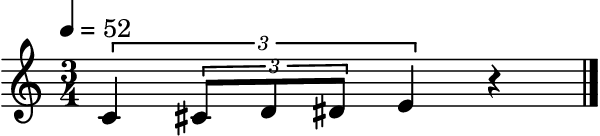

In [6]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3)),
    makeNote(61, F(2, 9)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(2, 9)),
    makeNote(64, F(2, 3)),
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.Part(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.003,"(1, 1, 3)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0049103,"(1, 1, 1, 1, 1, 3)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 4, 6]","gridError=0, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0293,"(1, 1, 1, 3, 2)","[«0.000:0.667 2/3♩ 4C», «0.667:0.900 7/30♩ 4C#», «0.900:1.000 1/10♩ 4D tiedNext»]","[0, 4, 7]","gridError=0.028, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0541 (0.0005408, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.035368,"(1, 1, 8)","[«0.000:0.667 2/3♩ 4C», «0.667:0.875 5/24♩ 4C#», «0.875:1.000 1/8♩ 4D tiedNext»]","[0, 2, 7]","gridError=0.0339, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.035693,"(1, 1, 1, 1, 1, 4)","[«0.000:0.667 2/3♩ 4C», «0.667:0.875 5/24♩ 4C#», «0.875:1.000 1/8♩ 4D tiedNext»]","[0, 4, 6]","gridError=0.0339, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.035991,"(1, 1, 3, 2)","[«0.000:0.667 2/3♩ 4C», «0.667:0.875 5/24♩ 4C#», «0.875:1.000 1/8♩ 4D tiedNext»]","[0, 4, 6]","gridError=0.0339, rhythmComplexity=0.38 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.039397,"(1, 1, 7)","[«0.000:0.667 2/3♩ 4C», «0.667:0.905 5/21♩ 4C#», «0.905:1.000 2/21♩ 4D tiedNext»]","[0, 2, 7]","gridError=0.0379, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.050625,"(1, 1, 5)","[«0.000:0.667 2/3♩ 4C», «0.667:0.867 1/5♩ 4C#», «0.867:1.000 2/15♩ 4D tiedNext»]","[0, 2, 5]","gridError=0.0505, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.051577,"(1, 1, 1, 3, 3)","[«0.000:0.667 2/3♩ 4C», «0.667:0.867 1/5♩ 4C#», «0.867:1.000 2/15♩ 4D tiedNext»]","[0, 4, 7]","gridError=0.0505, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0811 (0.0008112, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.003,"(3, 1, 1)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.222 1/9♩ 4D#», «0.222:0.333 1/9♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.222 1/9♩ 4D#», «0.222:0.333 1/9♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0043875,"(3, 3, 1, 1, 1, 1)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.222 1/9♩ 4D#», «0.222:0.333 1/9♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 2, 4, 6]","gridError=0, rhythmComplexity=0.0791 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.034324,"(4, 3, 1, 1, 1, 1)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.222 7/72♩ 4D#», «0.222:0.333 1/9♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 3, 5, 7]","gridError=0.0339, rhythmComplexity=0.0791 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.034324,"(3, 4, 1, 1, 1, 1)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.208 7/72♩ 4D#», «0.208:0.333 1/8♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 2, 4, 7]","gridError=0.0339, rhythmComplexity=0.0791 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.061075,"(8, 1, 1)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.208 1/12♩ 4D#», «0.208:0.333 1/8♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 3, 5, 8]","gridError=0.061, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.061388,"(4, 4, 1, 1, 1, 1)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.208 1/12♩ 4D#», «0.208:0.333 1/8♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 3, 5, 8]","gridError=0.061, rhythmComplexity=0.0791 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.06 (0.0006, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.061658,"(2, 3, 1, 1, 1, 1)","[«0.000:0.083 1/12♩ 4D tiedPrev», «0.083:0.222 5/36♩ 4D#», «0.222:0.333 1/9♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 1, 3, 5]","gridError=0.061, rhythmComplexity=0.25 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.061658,"(3, 2, 1, 1, 1, 1)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.250 5/36♩ 4D#», «0.250:0.333 1/12♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 2, 4, 5]","gridError=0.061, rhythmComplexity=0.25 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.063463,"(2, 3, 1, 1, 1)","[«0.000:0.100 1/10♩ 4D tiedPrev», «0.100:0.200 1/10♩ 4D#», «0.200:0.333 2/15♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 1, 2, 4]","gridError=0.0632, rhythmComplexity=0.0791 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0541 (0.0005408, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"


Node(3/2, 
  «0.000:0.667 2/3♩ 3/2 4C»
  Node(3/2, 
    «0.667:0.889 2/9♩ 3/2,3/2 4C#»
    «0.889:1.000 1/9♩ 3/2,3/2 4D tiedNext»
  )
) Node(3/2, 
  Node(3/2, 
    «1.000:1.111 1/9♩ 3/2,3/2 4D tiedPrev»
    «1.111:1.222 1/9♩ 3/2,3/2 4D#»
    «1.222:1.333 1/9♩ 3/2,3/2 4E»
  )
  «1.333:2.000 2/3♩ 3/2 4F»
) acrossBeat=True, syncopated=True
Node(3/2, 
  «0.667:0.889 2/9♩ 3/2,3/2 4C#»
  «0.889:1.000 1/9♩ 3/2,3/2 4D tiedNext»
) Node(3/2, 
  «1.000:1.111 1/9♩ 3/2,3/2 4D tiedPrev»
  «1.111:1.222 1/9♩ 3/2,3/2 4D#»
  «1.222:1.333 1/9♩ 3/2,3/2 4E»
) acrossBeat=True, syncopated=True
Node(3/2, 
  «0.667:0.889 2/9♩ 3/2,3/2 4C#»
  «0.889:1.000 1/9♩ 3/2,3/2 4D tiedNext»
) Node(3/2, 
  «1.000:1.111 1/9♩ 3/2,3/2 4D tiedPrev»
  «1.111:1.222 1/9♩ 3/2,3/2 4D#»
  «1.222:1.333 1/9♩ 3/2,3/2 4E»
) acrossBeat=True, syncopated=True



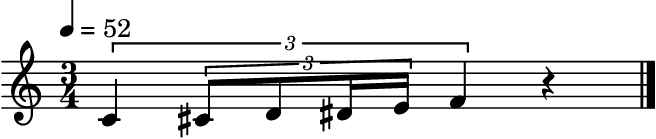

In [3]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3)),
    makeNote(61, F(2, 9)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(1, 9)),
    makeNote(64, F(1, 9)),
    
    makeNote(65, F(2, 3)),
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.Part(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 2 divisions: 


error,div,makeSnappedNotation,slots,info
0,"(3,)","[«0.000:0.333 1/3♩ rest», «0.333:1.000 2/3♩ 4C»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.12849,"(5,)","[«0.000:0.400 2/5♩ rest», «0.400:1.000 3/5♩ 4C»]","[0, 2]","gridError=0.128, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,makeSnappedNotation,slots,info
0.003,"(1, 1, 3)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.889 2/9♩ 4D», «0.889:1.000 1/9♩ 4D#»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.889 2/9♩ 4D», «0.889:1.000 1/9♩ 4D#»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0049103,"(1, 1, 1, 1, 1, 3)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.889 2/9♩ 4D», «0.889:1.000 1/9♩ 4D#»]","[0, 4, 6]","gridError=0, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0293,"(1, 1, 1, 3, 2)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.900 7/30♩ 4D», «0.900:1.000 1/10♩ 4D#»]","[0, 4, 7]","gridError=0.028, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0541 (0.0005408, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.035368,"(1, 1, 8)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.875 5/24♩ 4D», «0.875:1.000 1/8♩ 4D#»]","[0, 2, 7]","gridError=0.0339, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.035693,"(1, 1, 1, 1, 1, 4)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.875 5/24♩ 4D», «0.875:1.000 1/8♩ 4D#»]","[0, 4, 6]","gridError=0.0339, rhythmComplexity=0.333 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.035991,"(1, 1, 3, 2)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.875 5/24♩ 4D», «0.875:1.000 1/8♩ 4D#»]","[0, 4, 6]","gridError=0.0339, rhythmComplexity=0.38 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.039397,"(1, 1, 7)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.905 5/21♩ 4D», «0.905:1.000 2/21♩ 4D#»]","[0, 2, 7]","gridError=0.0379, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.050625,"(1, 1, 5)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.867 1/5♩ 4D», «0.867:1.000 2/15♩ 4D#»]","[0, 2, 5]","gridError=0.0505, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.051577,"(1, 1, 1, 3, 3)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.867 1/5♩ 4D», «0.867:1.000 2/15♩ 4D#»]","[0, 4, 7]","gridError=0.0505, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0811 (0.0008112, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"


Beat: 2 - 3 (dur: 1)
Skipped 0 divisions with a div. penalty > 0.1
Best 11 divisions: 


error,div,makeSnappedNotation,slots,info
0.004,"(9,)","[«0.000:0.111 1/9♩ 4E», «0.111:1.000 8/9♩ rest»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0061644,"(3, 1, 1, 1, 1, 1)","[«0.000:0.111 1/9♩ 4E», «0.111:1.000 8/9♩ rest»]","[0, 2]","gridError=0, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0361 (0.0003606, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.027006,"(8,)","[«0.000:0.125 1/8♩ 4E», «0.125:1.000 7/8♩ rest»]","[0, 1]","gridError=0.0269, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.027393,"(2, 1, 1, 1, 1)","[«0.000:0.100 1/10♩ 4E», «0.100:1.000 9/10♩ rest»]","[0, 1]","gridError=0.0223, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.027683,"(4, 1, 1, 1, 1, 1)","[«0.000:0.125 1/8♩ 4E», «0.125:1.000 7/8♩ rest»]","[0, 3]","gridError=0.0269, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.041188,"(11,)","[«0.000:0.091 1/11♩ 4E», «0.091:1.000 10/11♩ rest»]","[0, 1]","gridError=0.037, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.1 (0.001, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.043496,"(3, 1, 1, 1, 1)","[«0.000:0.133 2/15♩ 4E», «0.133:1.000 13/15♩ rest»]","[0, 2]","gridError=0.0402, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.0541 (0.0005408, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.051095,"(2, 1, 1, 1, 1, 1)","[«0.000:0.083 1/12♩ 4E», «0.083:1.000 11/12♩ rest»]","[0, 1]","gridError=0.0485, rhythmComplexity=0.5 (numNotesAcrossSubdics=1, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.054417,"(7,)","[«0.000:0.143 1/7♩ 4E», «0.143:1.000 6/7♩ rest»]","[0, 1]","gridError=0.0544, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.088802,"(6,)","[«0.000:0.167 1/6♩ 4E», «0.167:1.000 5/6♩ rest»]","[0, 1]","gridError=0.0875, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Node(3/2, 
  «0.000:0.333 1/3♩ 3/2 rest»
  «0.333:1.000 2/3♩ 3/2 4C»
) Node(3/2, 
  «1.000:1.667 2/3♩ 3/2 4C#»
  Node(3/2, 
    «1.667:1.889 2/9♩ 3/2,3/2 4D»
    «1.889:2.000 1/9♩ 3/2,3/2 4D#»
  )
) acrossBeat=True, syncopated=False



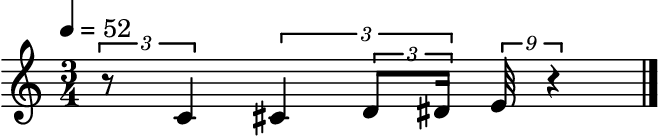

In [1]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3), offset=F(1, 3)),
    makeNote(61, F(2, 3)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(1, 9)),
    makeNote(64, F(1, 9)),
    
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.Part(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')